In [14]:
import eDiskplot as eplot
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, ImageNormalize
from eDisk_source_dict import source_dict
import analysis_utils as au
from qdisk.product import calculate_averaged_spectra, calculate_pvdiagram, calculate_moment, calculate_radial_profile
from qdisk.model import Keplerian_velocity
import qdisk.utils as utils
%matplotlib widget
%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out"})

source = "L1489IRS"
baseline = "SBLB"
line = "continuum"
robust = 1.0
vsys = source_dict[source]["v_sys"]
center_coord = source_dict[source]["radec"]
vrange = 5
norm_kwargs = {"cont": dict(stretch=AsinhStretch(a=0.02), vmin=0.0),
               "M0": dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
               "M1": dict(vmin=vsys-vrange, vmax=vsys+vrange),
               "M8": dict()}
moment_chunks = 4
imagename = au.imageproductpath + au.get_image_basename(source, baseline, line, robust=robust)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# radial profile
rmax = 4
wedge_angle = 90
profilename = au.VADPpath + au.get_image_basename(source, baseline, line, robust=robust).replace(".fits", "_radialProfileWedge{}deg.txt".format(wedge_angle))
calculate_radial_profile(
    imagename,
    PA=source_dict[source]["PA"],
    incl=source_dict[source]["incl"],
    center_coord=center_coord,
    rmax=rmax,
    wedge_angle=wedge_angle,
    save=True,
    savefilename=profilename,
    savefileheader="r [arcsec] \t I [mJy/beam] \t dI [mJy/beam]"
)


Loading data...
Calculating radial profile...


(array([0.01163395, 0.03490185, 0.05816975, 0.08143765, 0.10470555,
        0.12797345, 0.15124135, 0.17450925, 0.19777715, 0.22104506,
        0.24431296, 0.26758086, 0.29084876, 0.31411666, 0.33738456,
        0.36065246, 0.38392036, 0.40718826, 0.43045616, 0.45372406,
        0.47699196, 0.50025986, 0.52352776, 0.54679566, 0.57006356,
        0.59333146, 0.61659937, 0.63986727, 0.66313517, 0.68640307,
        0.70967097, 0.73293887, 0.75620677, 0.77947467, 0.80274257,
        0.82601047, 0.84927837, 0.87254627, 0.89581417, 0.91908207,
        0.94234997, 0.96561787, 0.98888577, 1.01215367, 1.03542158,
        1.05868948, 1.08195738, 1.10522528, 1.12849318, 1.15176108,
        1.17502898, 1.19829688, 1.22156478, 1.24483268, 1.26810058,
        1.29136848, 1.31463638, 1.33790428, 1.36117218, 1.38444008,
        1.40770798, 1.43097589, 1.45424379, 1.47751169, 1.50077959,
        1.52404749, 1.54731539, 1.57058329, 1.59385119, 1.61711909,
        1.64038699, 1.66365489, 1.68692279, 1.71

[Text(0.5, 0, 'Radius [arcsec]'),
 Text(0, 0.5, 'I [mJy beam$^{-1}$ km s$^{-1}$]'),
 None,
 (0.0, 4.0)]

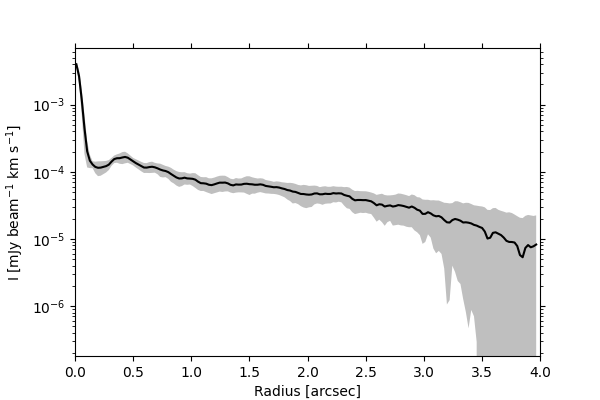

In [17]:
# plot radial profile
fig, ax = plt.subplots(figsize=(6, 4))

eplot.plot_radial_profile(profilename, ax=ax, color="black")
ax.set(xlabel="Radius [arcsec]", ylabel="I [mJy beam$^{-1}$ km s$^{-1}$]", yscale="log", xlim=(0.0, 4.0))